<a href="https://colab.research.google.com/github/Ulyssesbebem/Tarefas/blob/main/Tarefa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [286]:
import cv2
import zipfile
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, BatchNormalization, ZeroPadding2D, MaxPool2D, Activation, add
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
tf.__version__


'2.12.0'

In [287]:
!gdown --id 1L4mdCDBgybKqr5Wo-kqT8HXcBJ9HXqSX

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1L4mdCDBgybKqr5Wo-kqT8HXcBJ9HXqSX
To: /content/trash_nov_22_2018.zip
100% 42.8M/42.8M [00:00<00:00, 98.8MB/s]


In [288]:
FILE='trash_nov_22_2018.zip'

In [289]:
archive = zipfile.ZipFile('trash_nov_22_2018.zip', 'r')
archive.extractall()

In [290]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [291]:
Img_Size = 80
ref = 'jpg'
notref = 'met'

In [292]:
X= []
Y =[]
n = len(img_name)
i = 0
for i in range(n):
  name = img_name[i]
  if(ref in name):
    Y.append(name)
    #X.append(cv2.imread(name,0))
    X.append(cv2.imread(name))
m = len(Y)
print(n,m)

2527 2527


In [293]:
name[-3:]

'jpg'

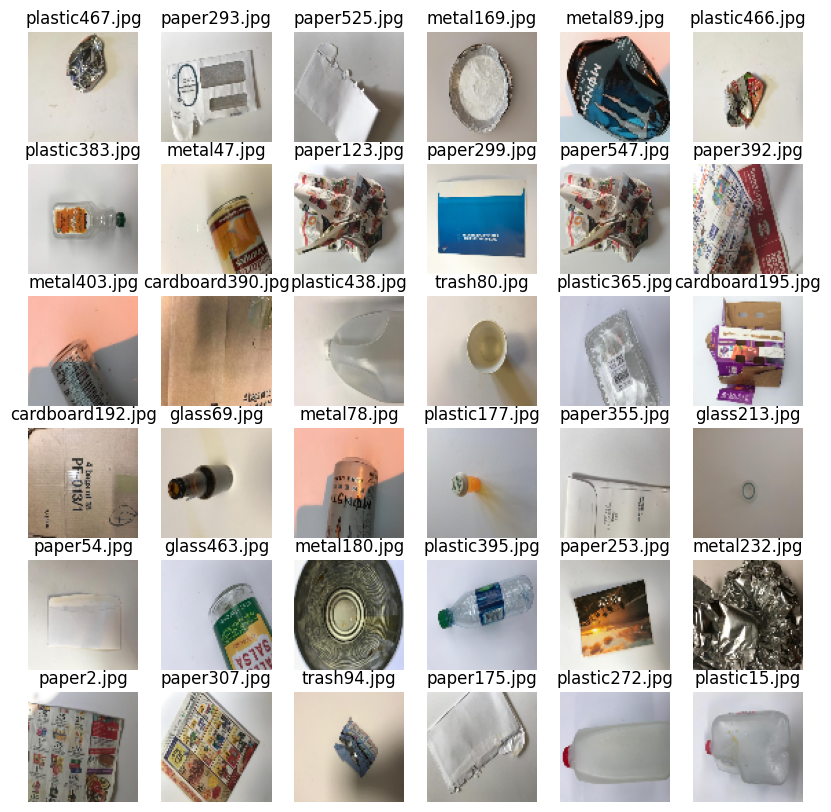

In [294]:
plt.figure(figsize=(10, 10))
m = len(Y)
for i in range(36):
  ax = plt.subplot(6, 6, i + 1)
  idx = np.random.randint(m)
  RGB_img = cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB)
  resized = cv2.resize(RGB_img, (Img_Size,Img_Size))
  plt.imshow(resized)
  plt.title(Y[idx])
  plt.axis("off")

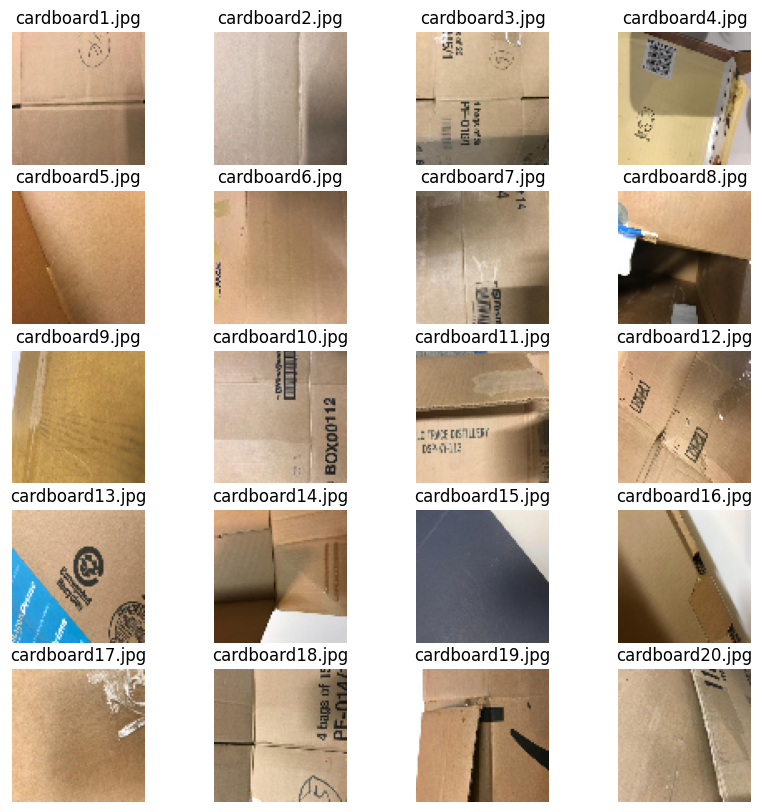

In [295]:
plt.figure(figsize=(10, 10))
X_test = X
Y_test = Y
for i in range(20):
  ax = plt.subplot(5, 4, i + 1)
  RGB_img = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB)
  resized = cv2.resize(RGB_img, (Img_Size,Img_Size))
  plt.imshow(resized)
  plt.title(Y_test[i])
  plt.axis("off")

In [296]:
nome = Y[0]

In [297]:
nome [0:4]

'card'

In [298]:
lista =[]
for word in Y:
  lista.append(word[0:4])



In [299]:
set(lista)

{'card', 'glas', 'meta', 'pape', 'plas', 'tras'}

In [300]:
classes = list(set(lista))

In [301]:
y_data = []
for word in Y:
  if word[0:4]==classes[0]:
    y_data.append(0)
  elif word[0:4]==classes[1]:
    y_data.append(1)
  elif word[0:4]==classes[2]:
    y_data.append(2)
  elif word[0:4]==classes[3]:
    y_data.append(3)
  elif word[0:4]==classes[4]:
    y_data.append(4)
  else:
    y_data.append(5)

In [302]:
y_data

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [303]:
Y=y_data

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

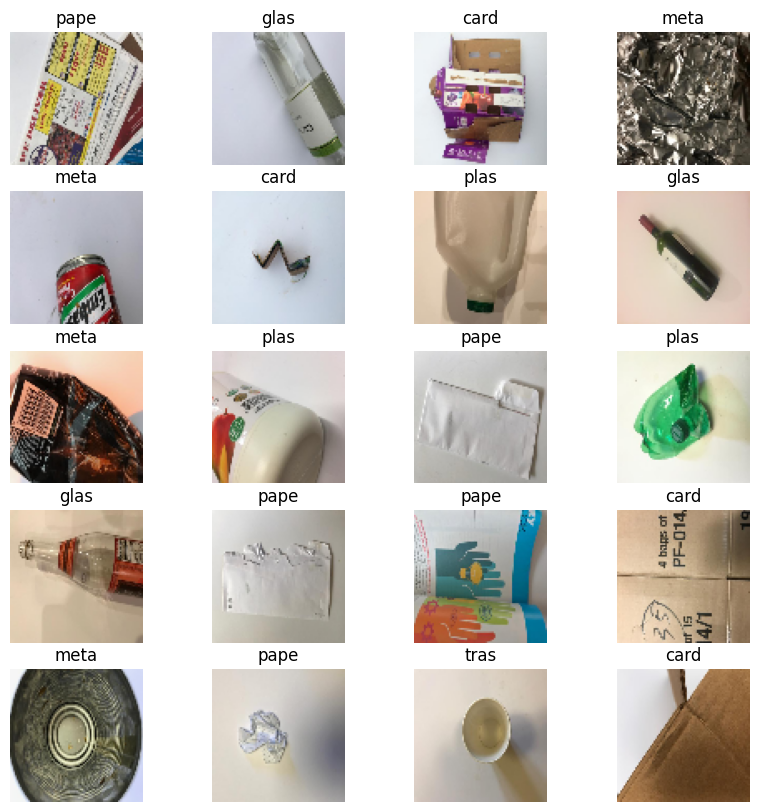

In [305]:
plt.figure(figsize=(10, 10))
for i in range(20):
  ax = plt.subplot(5, 4, i + 1)
  RGB_img = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB)
  resized = cv2.resize(RGB_img, (Img_Size,Img_Size))
  plt.imshow(resized)
  plt.title(classes[y_test[i]])
  plt.axis("off")

In [306]:
X_train[0].shape

(384, 512, 3)

In [307]:
df = pd.DataFrame({'class':y_train,})
y_train = pd.get_dummies(df['class'])
y_train

,0,1,2,3,4,5
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
2016,0,0,1,0,0,0
2017,0,0,0,0,1,0
2018,0,0,0,0,1,0
2019,0,0,0,0,1,0


In [308]:
num_classes = 6

In [309]:
for i in range(6):
  df_plot= df[(df["class"] == i)]
  n= df_plot.shape[0]
  print(classes[i],n)

plas 383
glas 394
pape 476
card 332
meta 323
tras 113


In [310]:
df = pd.DataFrame({'class':y_test})
y_test = pd.get_dummies(df['class'])
y_test

,0,1,2,3,4,5
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
501,0,0,1,0,0,0
502,0,0,0,1,0,0
503,0,1,0,0,0,0
504,0,0,0,0,1,0


In [317]:
D =len(classes)
model_output = Dense(D, activation= 'softmax') #'relu')
model_output = model_output(model.layers[-2].output)
model_input = model.input
model_new = Model(inputs=model_input, outputs=model_output)


AttributeError: ignored